OCI OpenSearch Service sample notebook.

Copyright (c) 2024 Oracle, Inc. All rights reserved. Licensed under the [Universal Permissive License (UPL) v 1.0](https://oss.oracle.com/licenses/upl/).

In [3]:
from IPython.display import HTML
import os
from IPython.display import Image, display
from utils import stack_images_horizontally, show_image

# 1. Intro 

OpenSearch has seen rapid adoption in recent years, particularly as companies increasingly embrace large language models (LLMs) to drive data insights and leverage intelligent search capabilities for their custom business use cases. OpenSearch's continuous commitment to delivering seamless integration with the latest AI/ML features has allowed organizations to build powerful observability, search, and analytics engines, which are critical as LLM usage grows. With OCI OpenSearch poised to roll out it's 2.15 version customers in the coming weeks, there is already a noticeable enthusiasm and eagerness from some of our biggest clients, such as  NetSuite, to leverage the latest  AI/ML features including GenAI Assistant and Learn To Rank, to solve strategic business problems.   

Some of the major pain points we gathered from our 2.11 customers revolved around setting Conversational search workflows/ RAG pipelines, but more importantly, the complexities of algorithms for pre-processing and ingesting large volumes unstructured or structured data, particularly from numerous formats such as PDF, CSV, EXCEL, WORD, DATA LAKES, etc, and making it accessible for LLM-driven applications that require both speed and precision in retrieving information. Therefore, integrating LangChain with OpenSearch has become crucial as it facilitates efficient query handling and retrieval-augmented generation (RAG), empowering LLMs with more contextual and accurate responses. LangChain provides an easy-to-use framework for creating and managing complex LLM workflows, allowing developers to streamline the integration between LLMs and OpenSearch. This combination enhances search relevancy by allowing language models to retrieve the most pertinent information from vast data stores, improving response quality for end-users. By seamlessly integrating LangChain with OpenSearch, our customers can reduce development overhead and create more robust AI applications that are well-suited to real-world needs, such as customer support, document intelligence, and personalized recommendations.

Additionally, our integration with Oracle Accelerated Data Science (ADS) and OCI Gen AI can significantly speed up the development and production deployment of enterprise AI use cases with minimal effort and code. Oracle ADS provides a comprehensive suite of tools for data scientists to build, train, and deploy models with minimal friction, automating much of the tedious work associated with data preparation and model lifecycle management. This streamlined approach is particularly beneficial for businesses seeking to implement scalable AI solutions quickly without requiring a large team of data scientists. By integrating Oracle ADS with OpenSearch and LangChain, our Customers can efficiently operationalize AI and leverage advanced data insights with fewer resources, enabling faster and more accessible implementation of high-value use cases.



# 2. Setting Up Oracle Accelerated Data Science for your Tenancy
  - **Step 1:**  Create a VCN with internet access. 
  - **Step 2:**  Create User Group and Dynamic Group
  - **Step 3:**  Setup Mandatory IAM policies to grant required access to group, and manage resources with dynamic group
  - **Step 4:**  Configure AI Quick Action (AQUA) 
  - **Step 5:**  Create Data Science Project
  - **Step 6:**  Create & Launch NoteBook Session
  - **Step 7:**  Configure Your Notebook for Langchain
  - **Step 8:**  Deploy a Model with AQUA
  

## &nbsp;&nbsp;&nbsp;&nbsp;Step 1: Create a VCN with Internet Access

Fist you need to follow this documentation to [Create a VCN](https://docs.oracle.com/en-us/iaas/data-science/data-science-tutorial/get-started.htm#create-vcn) within your tenancy, ensuring proper subnets and security lists are set up to allow secure communications for data science operations.  

Preferably, use the Wizard  and choose the option to Create a VCN with Internet. One very **crucial step is to make sure to add the appropriate ingress and egress rules to the private subnet of your VCN**.  The absence of these rules might prevent the Notebook from having access to internet, which in turn will prevent you from installed critical libraries and dependencies.




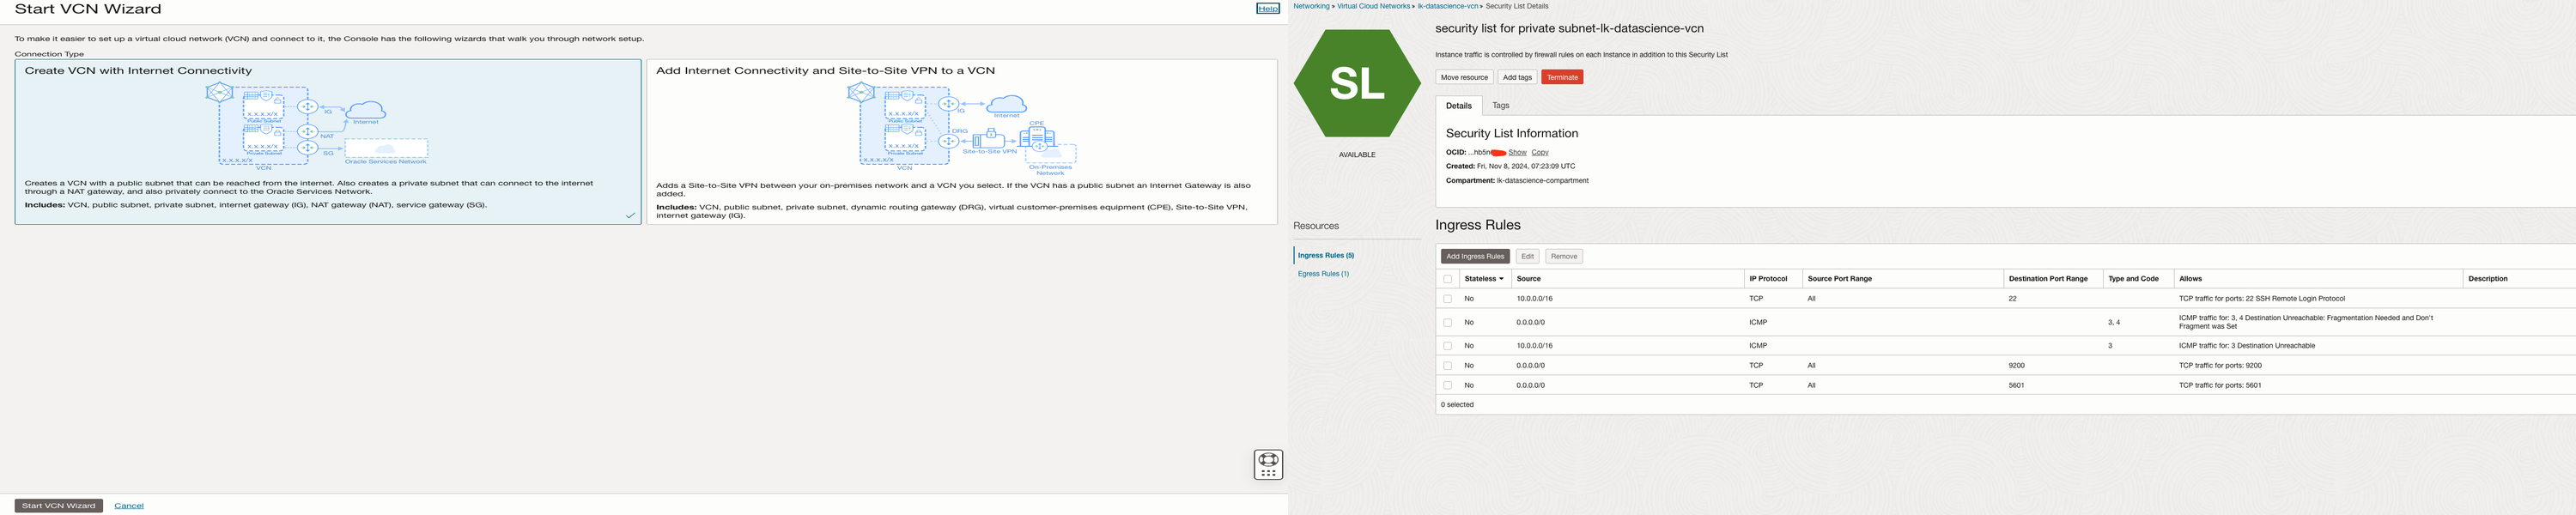

In [ ]:
# Call the function stack and display images
image_paths = ["images/setup-images/vcn-wizard-1.png", "images/setup-images/vcn-wizard-2.png"]
stack_images_horizontally(image_paths, width=1500, height=600)


## &nbsp;&nbsp;&nbsp;&nbsp;Step 2: Create Required Groups and Dynamic Groups

Next, you have to define a <span style="color: green;">Group</span> for your data scientists and a <span style="color: green;">Dynamic Group</span> for the Data Science resources. This enables appropriate permissions for performing data science activities within Oracle Cloud Infrastructure (OCI). You can follow  the documentation steps to create a [Data Scientist User Group](https://docs.oracle.com/en-us/iaas/data-science/data-science-tutorial/get-started.htm#user-group) and a [Dynamic Group](https://docs.oracle.com/en-us/iaas/data-science/data-science-tutorial/get-started.htm#dynamic-group).




## &nbsp;&nbsp;&nbsp;&nbsp;Step 3: Setup required IAM  Policies:
 Establish policies to grant permissions to your groups and dynamic groups. For example, create policies that allow members to use Data Science services and access necessary data resources. Ensure policies cover network communication and data access permissions. The detailed  list of required policies can be found in this [documentation](https://docs.oracle.com/en-us/iaas/data-science/data-science-tutorial/get-started.htm#create-policy). More extensive list of policies on Model Deployment can be found this [Model Deployment Policies](https://docs.oracle.com/en-us/iaas/data-science/using/model-dep-policies-auth.htm#model_dep_policies_auth__predict-endpoint) documentation This includes policies for:

- policies to management model deployment: 
```bash
allow group <group-name> to manage data-science-models in compartment <compartment-name>
allow group <group-name> to manage data-science-model-deployments in compartment <compartment-name>
allow dynamic-group <dynamic-group-name> to manage  data-science-model-deployments in compartment <compartment-name>
....
```   
- policies to authorize access to Predict Endpoints 
- policies to for model deployment access to publish Conda Bucket 
- policies to give model deployment access to a custom container using resource principal
- policies for model deployment to object storage bucket

It it important that you create your IAM policy document in the root compartment. You can add all the required rules into the same policy document.



## &nbsp;&nbsp;&nbsp;&nbsp;Step 4: Configuring AI Quick Action
In Oracle Data Science, configure the AI Quick Action to accelerate model deployment and data analysis workflows. This involves setting up pre-configured AI pipelines and scripts that simplify routine tasks. AQUA will not work if you do not configure the required policies. 
For automated model deployment and inference,  you should also add the necessary [AQUA policies](https://github.com/oracle-samples/oci-data-science-ai-samples/tree/main/ai-quick-actions/policies#policies-1). 

```bash 
Define tenancy datascience as ocid1.tenancy.oc1..aaaaaaaax5hdic7ya6r5rxsgpifff4l6xdxzltnrncdzp3m75ubbvzqqzn3q
 
Endorse any-user to read data-science-models in tenancy datascience where ALL {target.compartment.name='service-managed-models'}
 
Endorse any-user to inspect data-science-models in tenancy datascience where ALL {target.compartment.name='service-managed-models'}
 
Endorse any-user to read object in tenancy datascience where ALL {target.compartment.name='service-managed-models', target.bucket.name='service-managed-models'}
 
.......
```

Once you create you data Science project and Laucnh a Notebook session **(see steps below)**, you should be able to Access AI Quick Action features in your NoteBook session to deploy models or automate data processing seamlessly with minimal code, leveraging the power of Oracle's data science ecosystem.

## &nbsp;&nbsp;&nbsp;&nbsp;Step 5: Create a Data Science Project
Navigate to the Oracle Data Science service in the OCI console and create a new project. Make sure to choose the same compartment where you created your VCN.


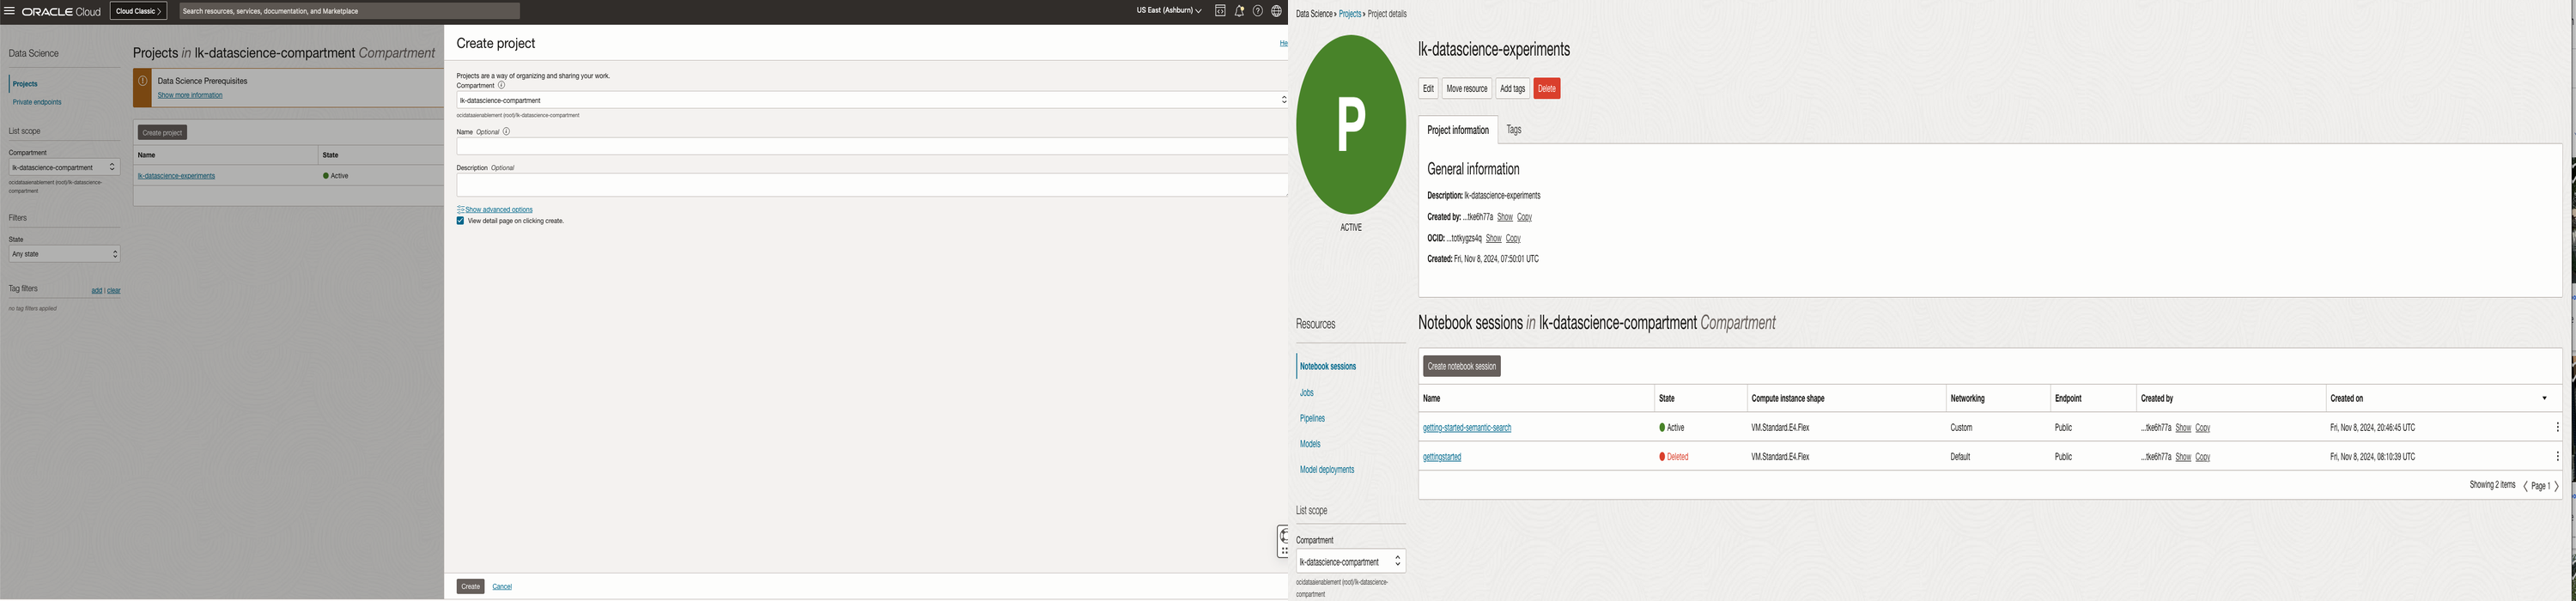

In [ ]:
# Call the function stack and display images
image_paths = ["images/setup-images/create-data-science-project.png", "images/setup-images/create-note-book-session.png"]
stack_images_horizontally(image_paths, width=1500, height=700)

## &nbsp;&nbsp;&nbsp;&nbsp;Step 5: Create and Launch NoteBook Session 
- Launch a JupyterLab environment by creating a notebook session within your project. Choose the desired compute shape and attach necessary data sources. While Creating the Notebook session, you need to make sure to choose the correct VCN and Private subnet that you configured earlier
- Once the JupyterLab session starts, you can install required libraries, including LangChain and OpenSearch Python clients, directly from the notebook interface using pip. Navigate to file explorer, click New, then click on Terminal to launch a new terminal. You can then install your libraries or dependencies in a Conda environment using PIP.

**<span style="color: red;"> NOTE:  It is crucial that you use a non-development tenancy for this. Tenancies such as OCI OpenSearch Dev and Staging tenancies are by default configured to not allow access to internet. That means you will not be able to install the necessary libraries into your NoteBook session. </span>**




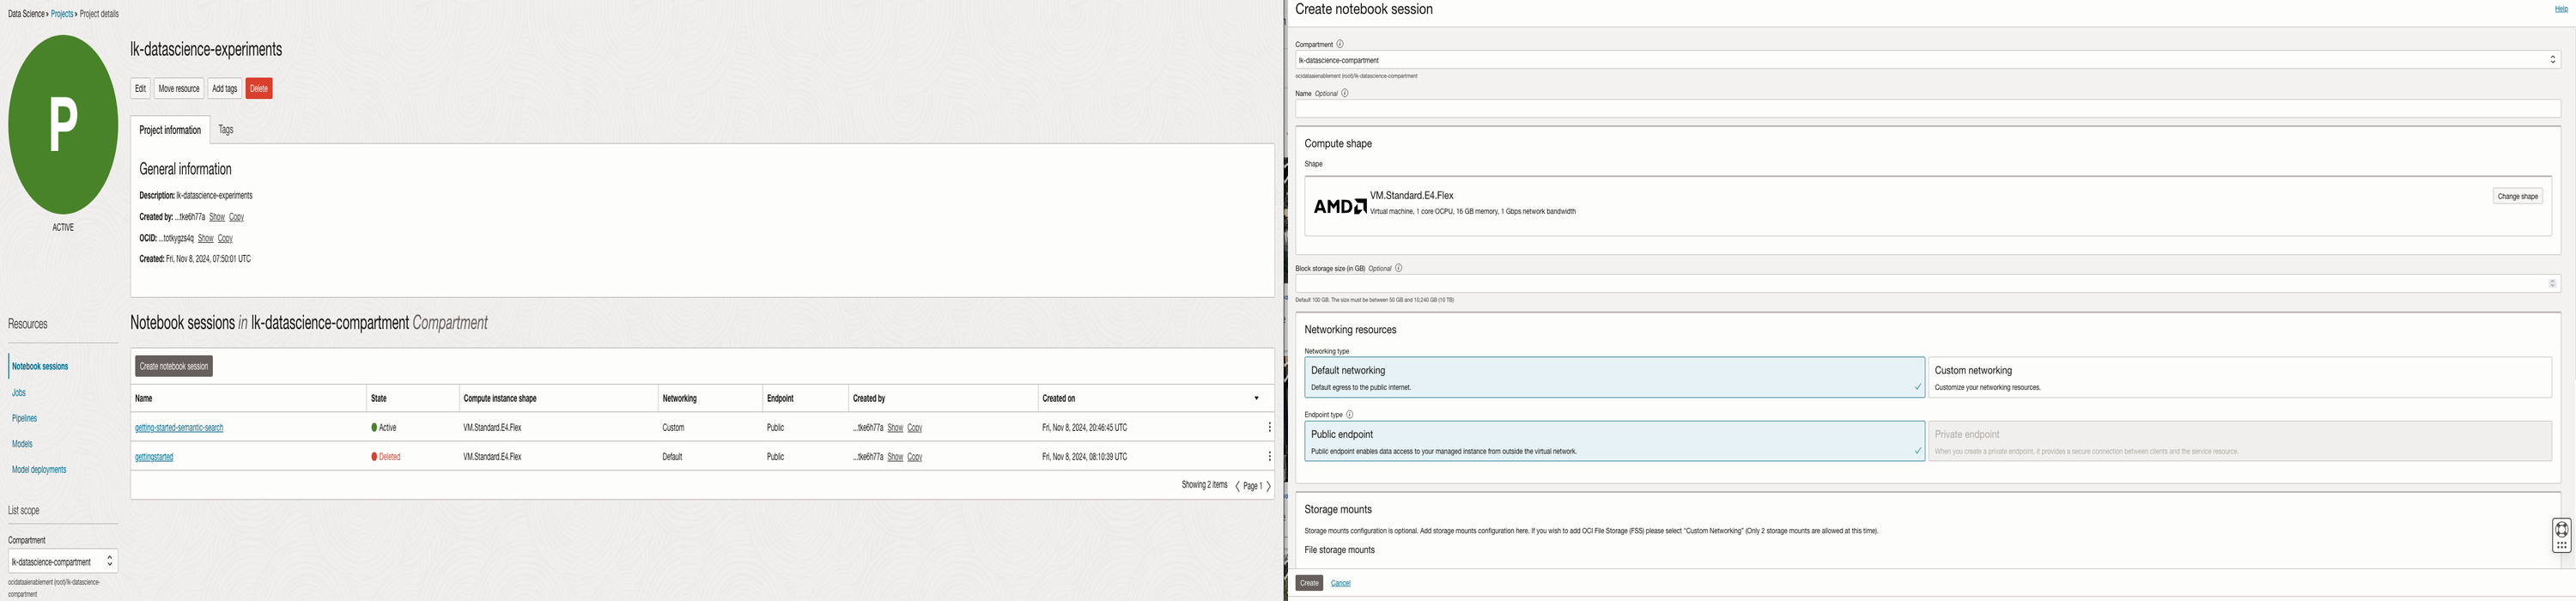

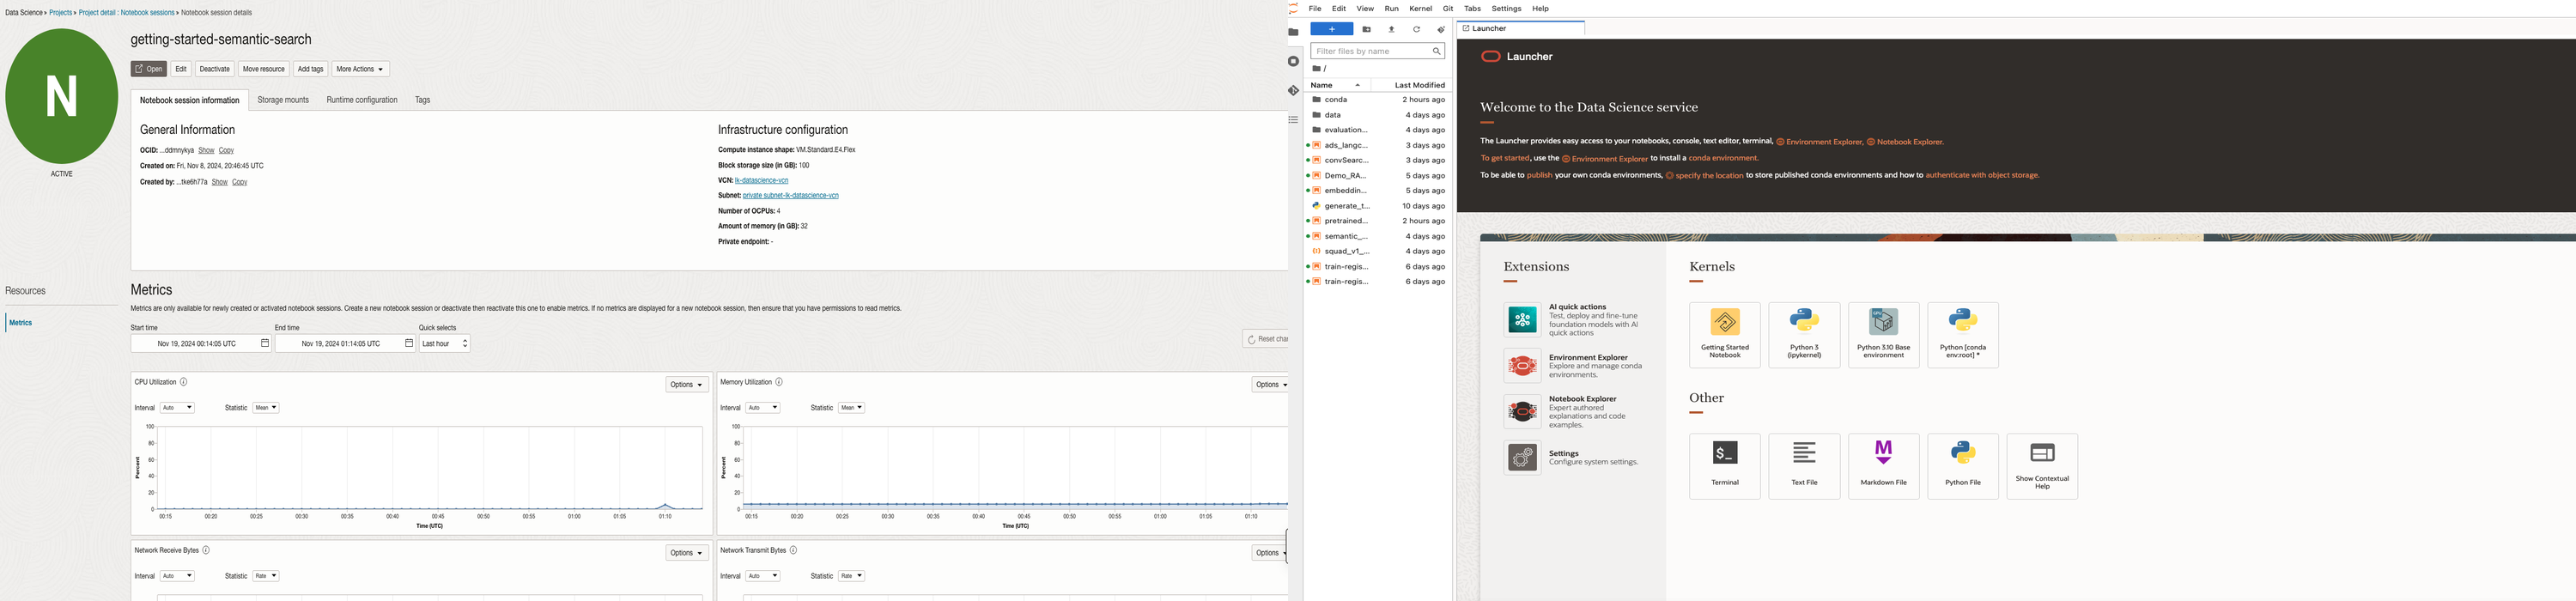

In [ ]:
# Call the function stack and display images
image_paths = ["images/setup-images/create-note-book-session.png","images/setup-images/create-notebook-session-2.png"]
stack_images_horizontally(image_paths, width=1500, height=700)
image_paths = ["images/setup-images/getting-started-notebook.png","images/setup-images/notebook-session-4.png"]
stack_images_horizontally(image_paths, width=1500, height=700)

## &nbsp;&nbsp;&nbsp;&nbsp;Step 6: Configuring LangChain with Jupyter Notebook

In your Jupyter Notebook, you can install LangChain and configure it to interact with OpenSearch.  Thereafter, you can establish a connection to your OpenSearch cluster and set up LangChain’s retrieval mechanisms to integrate your LLM workflows.
Customize your LangChain setup to manage document ingestion, prompt templates, and retrieval-augmented generation (RAG) to enhance model performance.
The Steps to install LangChain are as follows:

- Launch Terminal
- Create and Activate a Conda environment by running the following bash command in your terminal. 
```bash
odsc conda install -s python_p310_any_x86_64_v1
conda activate <environment name>
```
- Install **LangChain** and other crucial librairies in your conda environment
```bash
pip install  -U oracle_ads oci langchain langchain-community

```
- You can now create a NoteBook and set the environment for to the conda environment you created

You can using **pip** to install additional libraries in your environement as needed.

Configure LangChain


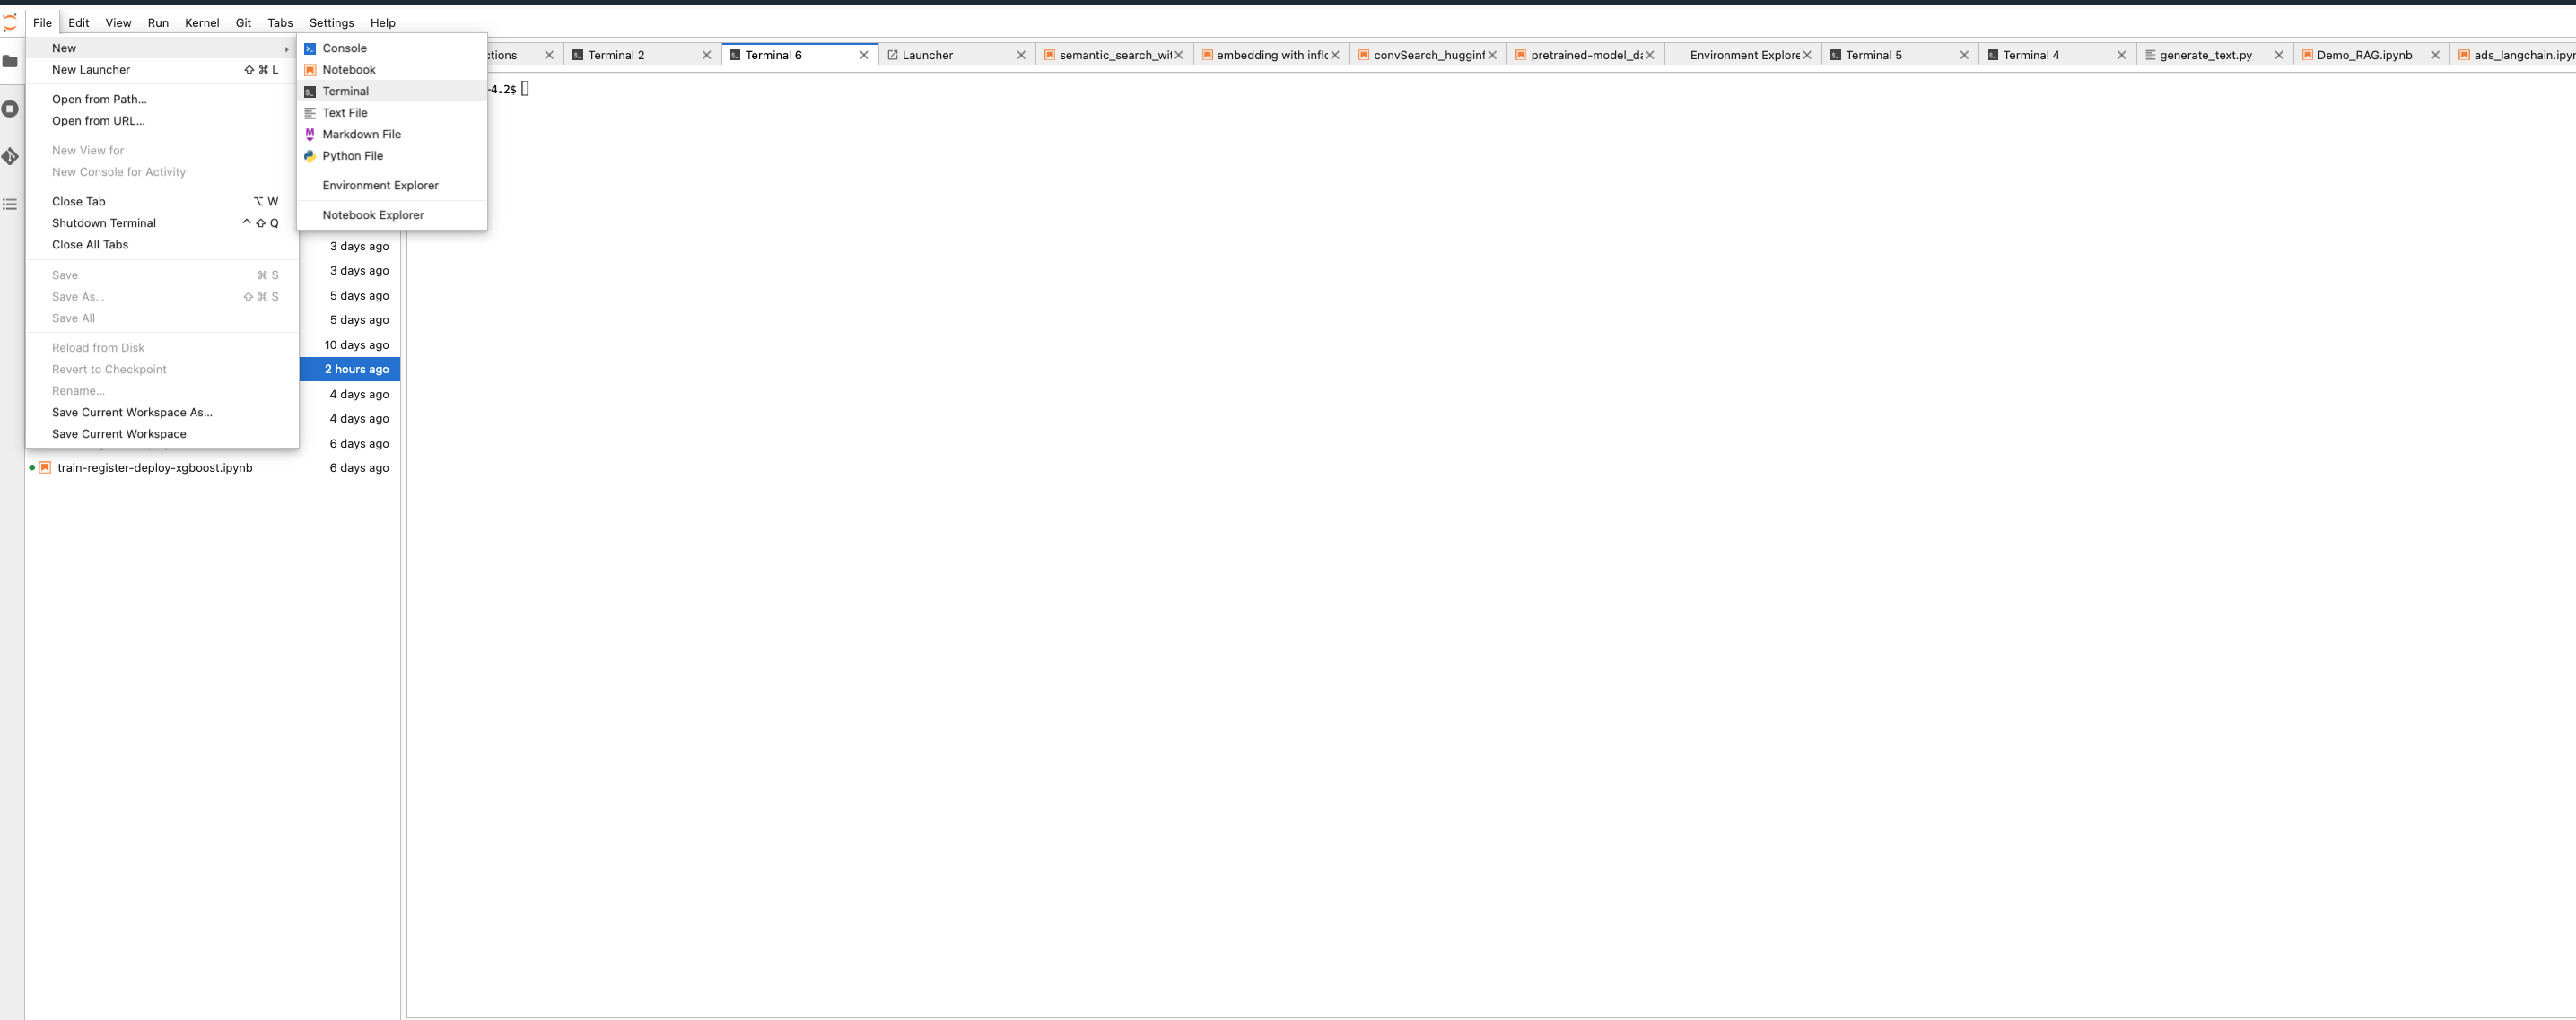

In [23]:
#Show image
show_image("images/setup-images/configure-LangChain.png", description="Confi", width=1500, height=400)

## &nbsp;&nbsp;&nbsp;&nbsp;Step 7: Deploy Model with AI Quick Action

If you followed instructions in step 4 to setup the necessary IAM policies, you should be able to Launch AQUA from your NoteBook session and use the available features to simplifier you model **Training**, **Evaluation** and **Deployment**.

The follow shows how you can leverage AQUA to deploy select a model from an extensive list of vetted models and deploy without hassle free wihtout writing a single line of code.

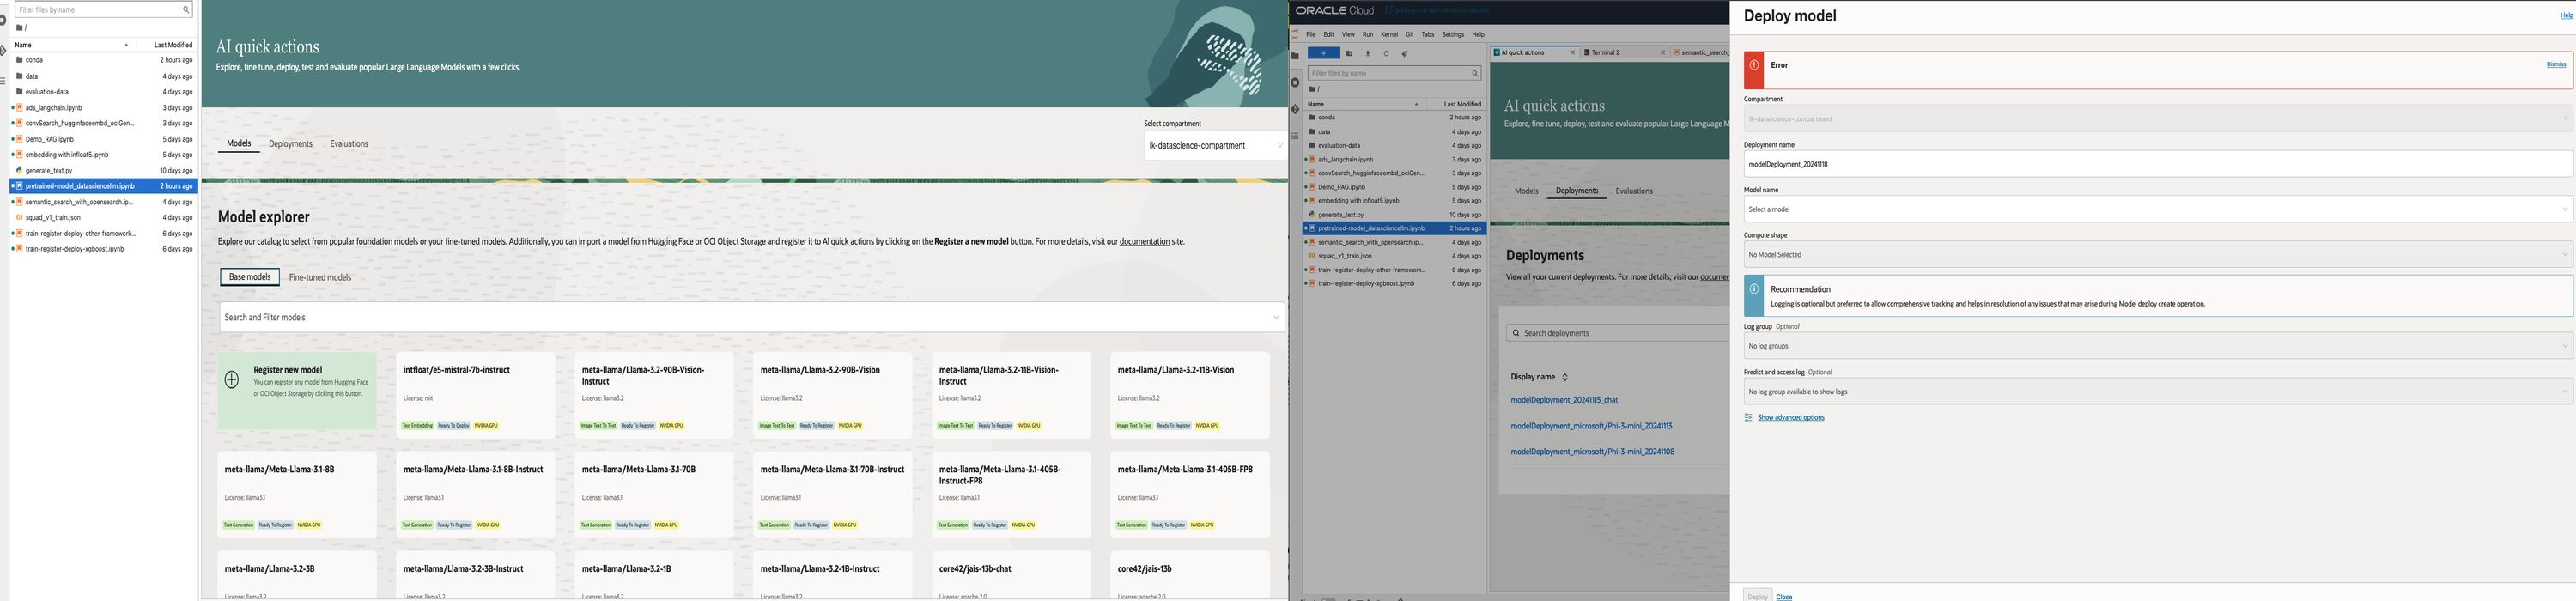

In [24]:
image_paths = ["images/setup-images/aqua-1.png","images/setup-images/aqua-2.png"]
stack_images_horizontally(image_paths, width=1500, height=700)

# 3.  Processing Documents with LangChain 
One of the super powers of LangChain is that it offer capabilities to process large volumes of documents efficiently and with minimal coding, be it structured or unstructured data. You simply have to import the necessary Document Processing Classes that are most suitable for your use invoke the load method to process the documents. 

```python 
import os
from langchain.document_loaders import PyPDFLoader, CSVLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
 
# Step 1: Load PDF and CSV Documents
def load_documents():
    # Load PDF Document
    pdf_loader = PyPDFLoader("sample_document.pdf")
    pdf_documents = pdf_loader.load()
 
    # Load CSV Document
    csv_loader = CSVLoader(file_path="sample_data.csv")
    csv_documents = csv_loader.load()
 
    # Combine both sets of documents
    all_documents = pdf_documents + csv_documents
    return all_documents
 
# Step 2: Split the documents into smaller chunks for better processing
def split_documents(documents):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=100
    )
    split_docs = text_splitter.split_documents(documents)
    return split_docs
 
 
# Main Execution
if __name__ == "__main__":
    # Load and process documents
    documents = load_documents()
    split_docs = split_documents(documents)
```

# 4. Performing Semantic Search and Conversational Search with OCI GenAI Models and LangChain Libraries
Set up LangChain to perform conversational search using OCI GenAI models. Configure LangChain to use Oracle’s GenAI endpoints for generating intelligent and contextual responses to user queries.
For semantic search, you can simply integrate Hugging Face Models to create embeddings that can be indexed in OpenSearch. You can use pip to install transformers library to have access to all the Hugging Face models.
You can implement a semantic search pipeline where user queries are transformed into embeddings and matched against the precomputed embeddings of your document corpus, enabling accurate and efficient information retrieval. 
Leverage LangChain’s conversational chain modules to handle complex queries and maintain context across interactions. This integration enables a robust, real-time conversational search experience powered by Oracle’s GenAI infrastructure.
Below is a simple example for creating conversational search using HuggingFace Embedding and OCI GenAI LLM Model 


```python
from langchain_community.chat_models.oci_generative_ai import ChatOCIGenAI
 
#define Embedding Model
embeddings = HuggingFaceEmbeddings()
     
# Set up OpenSearch Vector Store (make sure OpenSearch is configured)
vector_store = OpenSearchVectorStore.from_documents(
        documents=split_docs,
        embedding=embeddings,
        opensearch_url="http://localhost:9200",  # Replace with your OpenSearch URL
        index_name="<MY_INDEX_NAME>"
    )
 
# OCI GenAI Chat LLM
llm_model = ChatOCIGenAI(
            model_id="<GEN_AI_MODEL_NAME>",
            service_endpoint="<ENDPOINT>",
            compartment_id="<COMPARTMENT_ID>",
            auth_type="<AUTH_TYPE>",
            model_kwargs={"temperature": 0, "max_tokens": 500, 'top_p': 1.0},
            is_stream=False)
 
#Perform Conversational Search using LangChain with OpenSearch as Vector DB Retriever
retrieval_qa = RetrievalQA.from_chain_type(
        llm=llm_model,
        chain_type="stuff",
        retriever=vector_store.as_retriever()
    )
response = retrieval_qa.run(query)
```

By following these steps, our Customers can efficiently integrate LangChain with OpenSearch, Oracle Accelerated Data Science, and OCI GenAI. This approach provides a seamless and scalable solution for deploying enterprise-grade AI applications with minimal effort and maximum impact.

